In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import unidecode
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

In [2]:
movies = pd.read_parquet('Data_movies_.parquet')
movies.head(1)

,id,title,release_date,runtime,status,budget,revenue,return,popularity,vote_average,...,original_language,overview,genres_names,languages_movie,collect_name,production_name,countries_production,release_year,cast_names,crew_names
0,862,Toy Story,1995-10-30,81.0,Released,30000000.0,373554033.0,12.451801,21.946943,7.7,...,en,"Led by Woody, Andy's toys live happily in his ...","Animation, Comedy, Family",English,Toy Story Collection,Pixar Animation Studios,United States of America,1995.0,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter


In [3]:
movies.columns

Index(['id', 'title', 'release_date', 'runtime', 'status', 'budget', 'revenue',
       'return', 'popularity', 'vote_average', 'vote_count',
       'original_language', 'overview', 'genres_names', 'languages_movie',
       'collect_name', 'production_name', 'countries_production',
       'release_year', 'cast_names', 'crew_names'],
      dtype='object')

In [16]:
# Convertir la columna 'release_year' a tipo int y sobrescribir la columna en el mismo DataFrame
movies['release_year'] = movies['release_year'].fillna(0).astype(int)

# Guardar el DataFrame modificado en el mismo archivo Parquet
movies.to_parquet('Data_movies_.parquet', index=False)


### RESUMEN ESTADISTICO 

In [17]:
# Resumen estadístico por columnas
colum = ['runtime', 'budget', 'revenue', 'return', 'popularity', 'vote_average']
estadistica=movies[colum].describe(include='all')
print(estadistica)


            runtime        budget       revenue        return    popularity  \
count  45263.000000  4.552300e+04  4.552600e+04  4.552300e+04  45520.000000   
mean      94.113757  4.226039e+06  1.120927e+07  6.579124e+02      2.922663   
std       38.403905  1.741674e+07  6.429069e+07  7.457261e+04      6.003110   
min        0.000000  0.000000e+00  0.000000e+00  0.000000e+00      0.000000   
25%       85.000000  0.000000e+00  0.000000e+00  0.000000e+00      0.386310   
50%       95.000000  0.000000e+00  0.000000e+00  0.000000e+00      1.128305   
75%      107.000000  0.000000e+00  0.000000e+00  0.000000e+00      3.685490   
max     1256.000000  3.800000e+08  2.787965e+09  1.239638e+07    547.488298   

       vote_average  
count  45520.000000  
mean       5.618032  
std        1.924113  
min        0.000000  
25%        5.000000  
50%        6.000000  
75%        6.800000  
max       10.000000  


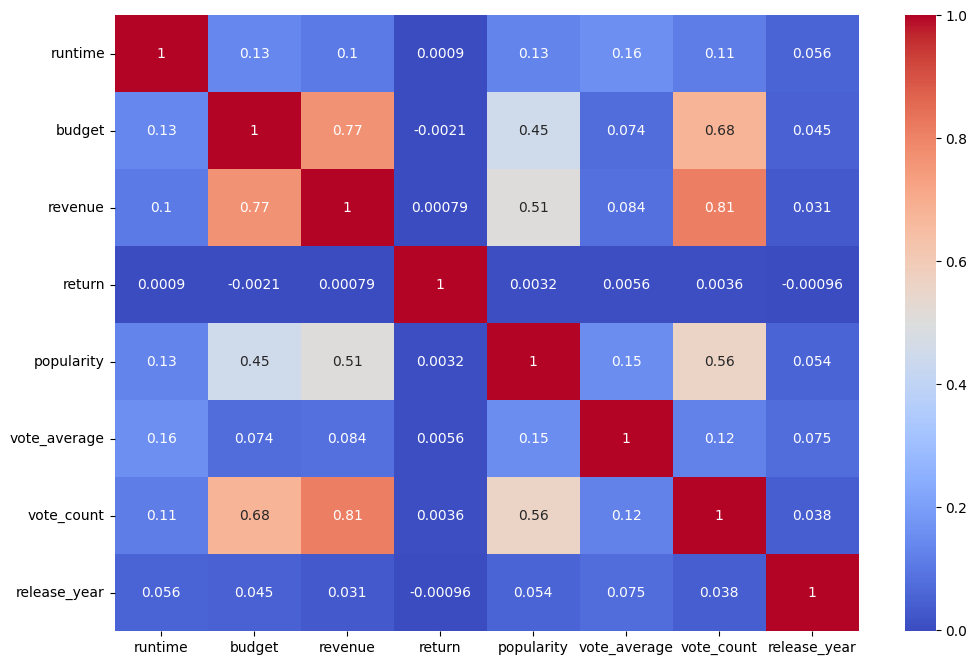

In [18]:
# CORRELACION ENTRE COLUMNAS

# Filtrar solo las columnas numéricas
numeric_columns = movies.select_dtypes(include=['number'])

# Calcular la correlación entre las columnas numéricas
correlation_matrix = numeric_columns.corr()

# Mapa de calor de la correlación entre variables numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

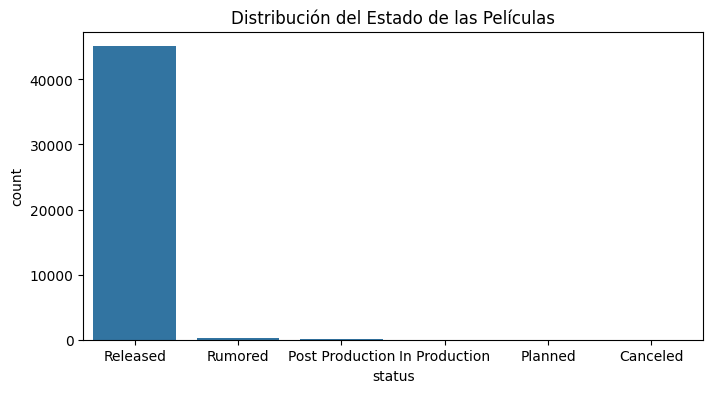

In [19]:
# Distribución de 'status' en el dataset por cantidad de peliculas

plt.figure(figsize=(8, 4))
sns.countplot(data=movies, x='status', order=movies['status'].value_counts().index)
plt.title('Distribución del Estado de las Películas')
plt.show()




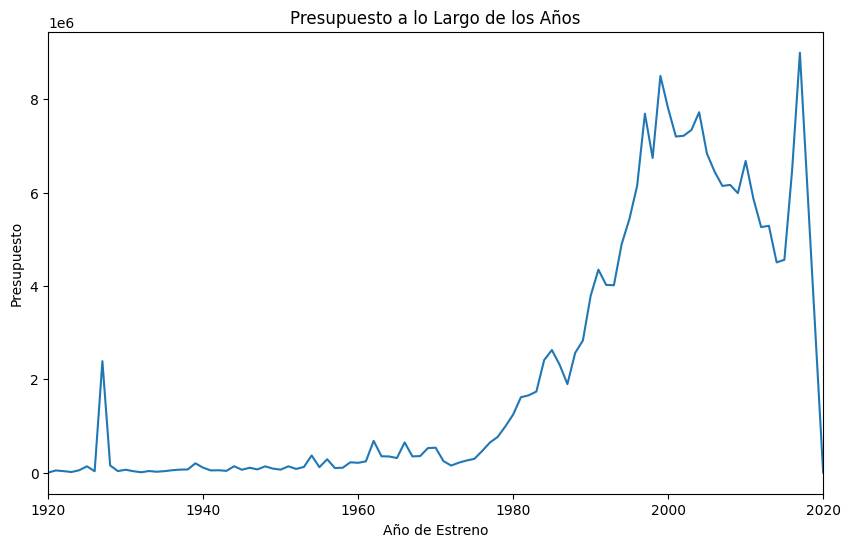

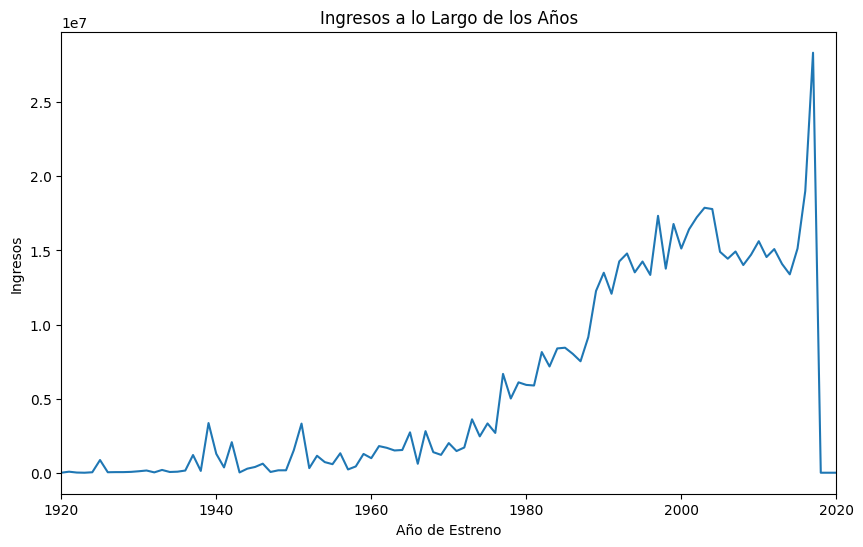

In [27]:
# ANALISIS DE PRESUPUESTO E INGRESOS POR AÑO 

# Relación entre 'release_year' y 'budget'
plt.figure(figsize=(10, 6))
sns.lineplot(data=movies, x='release_year', y='budget', errorbar=None)
plt.title('Presupuesto a lo Largo de los Años')
plt.xlim(1920, movies['release_year'].max())  # Ajustar el límite del eje x
plt.xlabel('Año de Estreno')
plt.ylabel('Presupuesto')
plt.show()

# Relación entre 'release_year' y 'revenue'
plt.figure(figsize=(10, 6))
sns.lineplot(data=movies, x='release_year', y='revenue', errorbar=None)
plt.title('Ingresos a lo Largo de los Años')
plt.xlim(1920, movies['release_year'].max())  # Ajustar el límite del eje x
plt.xlabel('Año de Estreno')
plt.ylabel('Ingresos')
plt.show()


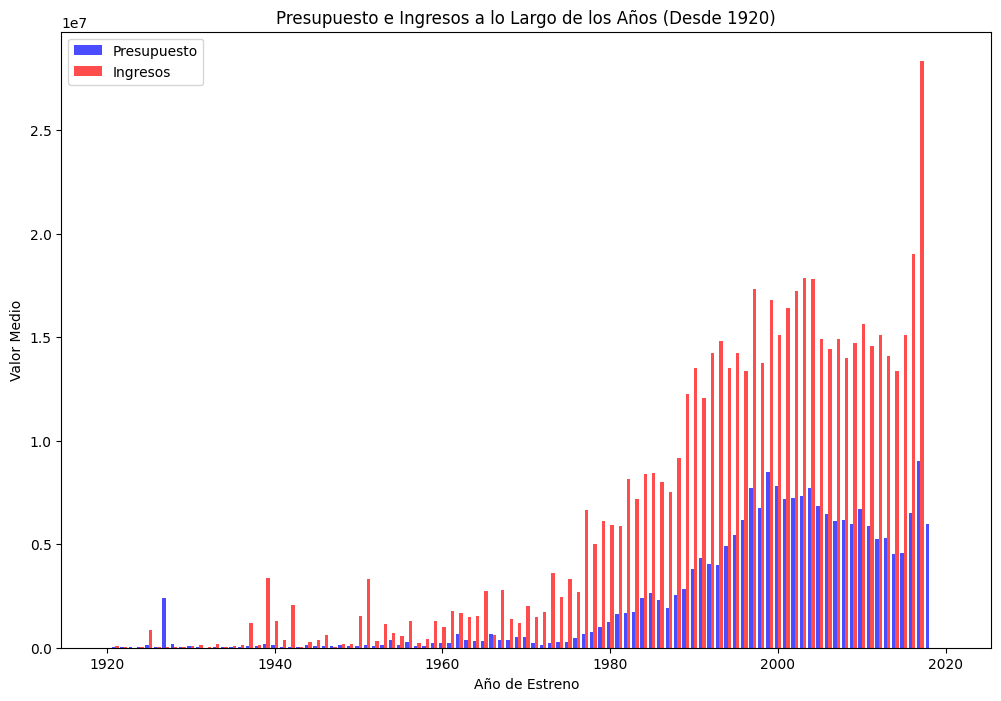

In [21]:
# COMPARACION DE PRESUPUESTOS E INGRESOS A PARTIR DE 1920 ( RECIMIENTO EXPONENCIA EN LA INDUSTRIAL)

# Asegurarse de que 'release_year' sea de tipo entero
movies['release_year'] = pd.to_numeric(movies['release_year'], errors='coerce').fillna(0).astype(int)

# Agrupar los datos por año y calcular la media de 'budget' y 'revenue'
annual_data = movies.groupby('release_year').agg({'budget': 'mean', 'revenue': 'mean'}).reset_index()

# Filtrar para mostrar solo los datos a partir de 1920
annual_data = annual_data[annual_data['release_year'] >= 1920]

# Crear el gráfico combinado
plt.figure(figsize=(12, 8))

# Crear barras para 'budget'
plt.bar(annual_data['release_year'] - 0.2, annual_data['budget'], width=0.4, label='Presupuesto', color='blue', alpha=0.7)

# Crear barras para 'revenue'
plt.bar(annual_data['release_year'] + 0.2, annual_data['revenue'], width=0.4, label='Ingresos', color='red', alpha=0.7)

# Configurar el eje x para mostrar cada 20 años
years = range(annual_data['release_year'].min(), annual_data['release_year'].max() + 1, 20)
plt.xticks(ticks=years)

# Añadir título, etiquetas y leyenda
plt.title('Presupuesto e Ingresos a lo Largo de los Años (Desde 1920)')
plt.xlabel('Año de Estreno')
plt.ylabel('Valor Medio')
plt.legend()

# Mostrar el gráfico
plt.show()


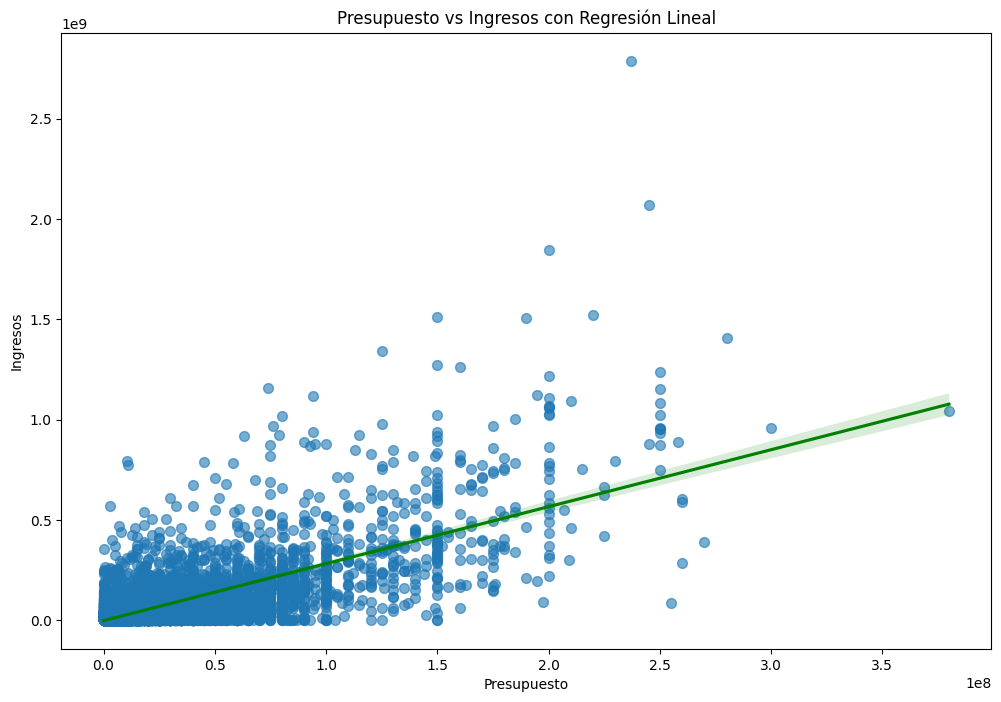

In [22]:
# ANALISIS DE PRESUPUESTO VS INGRESOS 

# Asegurarse de que 'budget' y 'revenue' sean de tipo numérico
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')
movies['revenue'] = pd.to_numeric(movies['revenue'], errors='coerce')

# Graficar el presupuesto frente a los ingresos con línea de regresión
plt.figure(figsize=(12, 8))
sns.regplot(data=movies, x='budget', y='revenue', scatter_kws={'s': 50, 'alpha': 0.6}, line_kws={'color': 'green'})
plt.title('Presupuesto vs Ingresos con Regresión Lineal')
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')
plt.show()



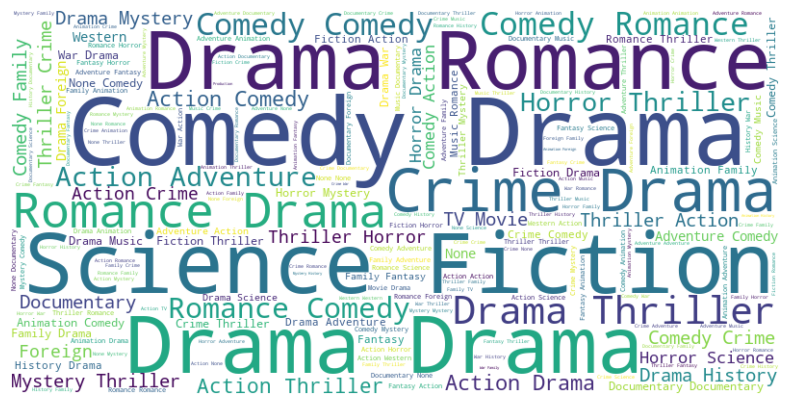

In [23]:
# NUBES DE PALABRAS CON RESPECTO A LA CANTIDAD DE PELICULAS POR GENERO

# Concatenar todos los géneros en un solo texto
genres_text = " ".join(genres for genres in movies['genres_names'].astype(str))

# Crear la nube de palabras para los géneros
wordcloud_genres = WordCloud(width=800, height=400, background_color='white').generate(genres_text)

# Mostrar la nube de palabras para los géneros
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_genres, interpolation='bilinear')
plt.axis('off')
plt.show()


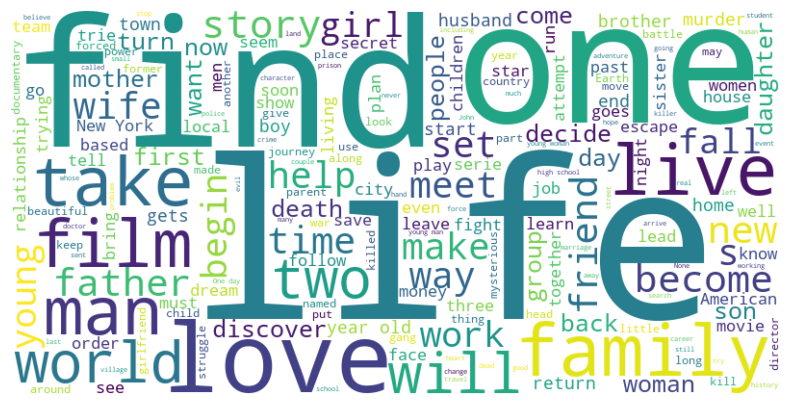

In [24]:
# NUBES DE PALABRAS CON RESPECTO A COLUMNA 'overview' QUE RESALTA LAS CARACTERSITCAS QUE MAS SE REPITEN 

# Concatenar todos los géneros en un solo texto
genres_text = " ".join(genres for genres in movies['overview'].astype(str))

# Crear la nube de palabras para los géneros
wordcloud_genres = WordCloud(width=800, height=400, background_color='white').generate(genres_text)

# Mostrar la nube de palabras para los géneros
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_genres, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
# VERIFICACIOND DE OUTLIERS PARA INSIDENCIAS EN EL MODELO DE RECOMENDACION

# Asegurarse de que las columnas de fechas estén en formato datetime
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')
# Filtrar solo las columnas numéricas
numeric_cols = movies.select_dtypes(include=[float, int]).columns

# Calcular el IQR solo para las columnas numéricas
Q1 = movies[numeric_cols].quantile(0.25)
Q3 = movies[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Detectar outliers
outliers = ((movies[numeric_cols] < (Q1 - 1.5 * IQR)) | (movies[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
print(f'Número de outliers detectados: {outliers.sum()}')


Número de outliers detectados: 20386


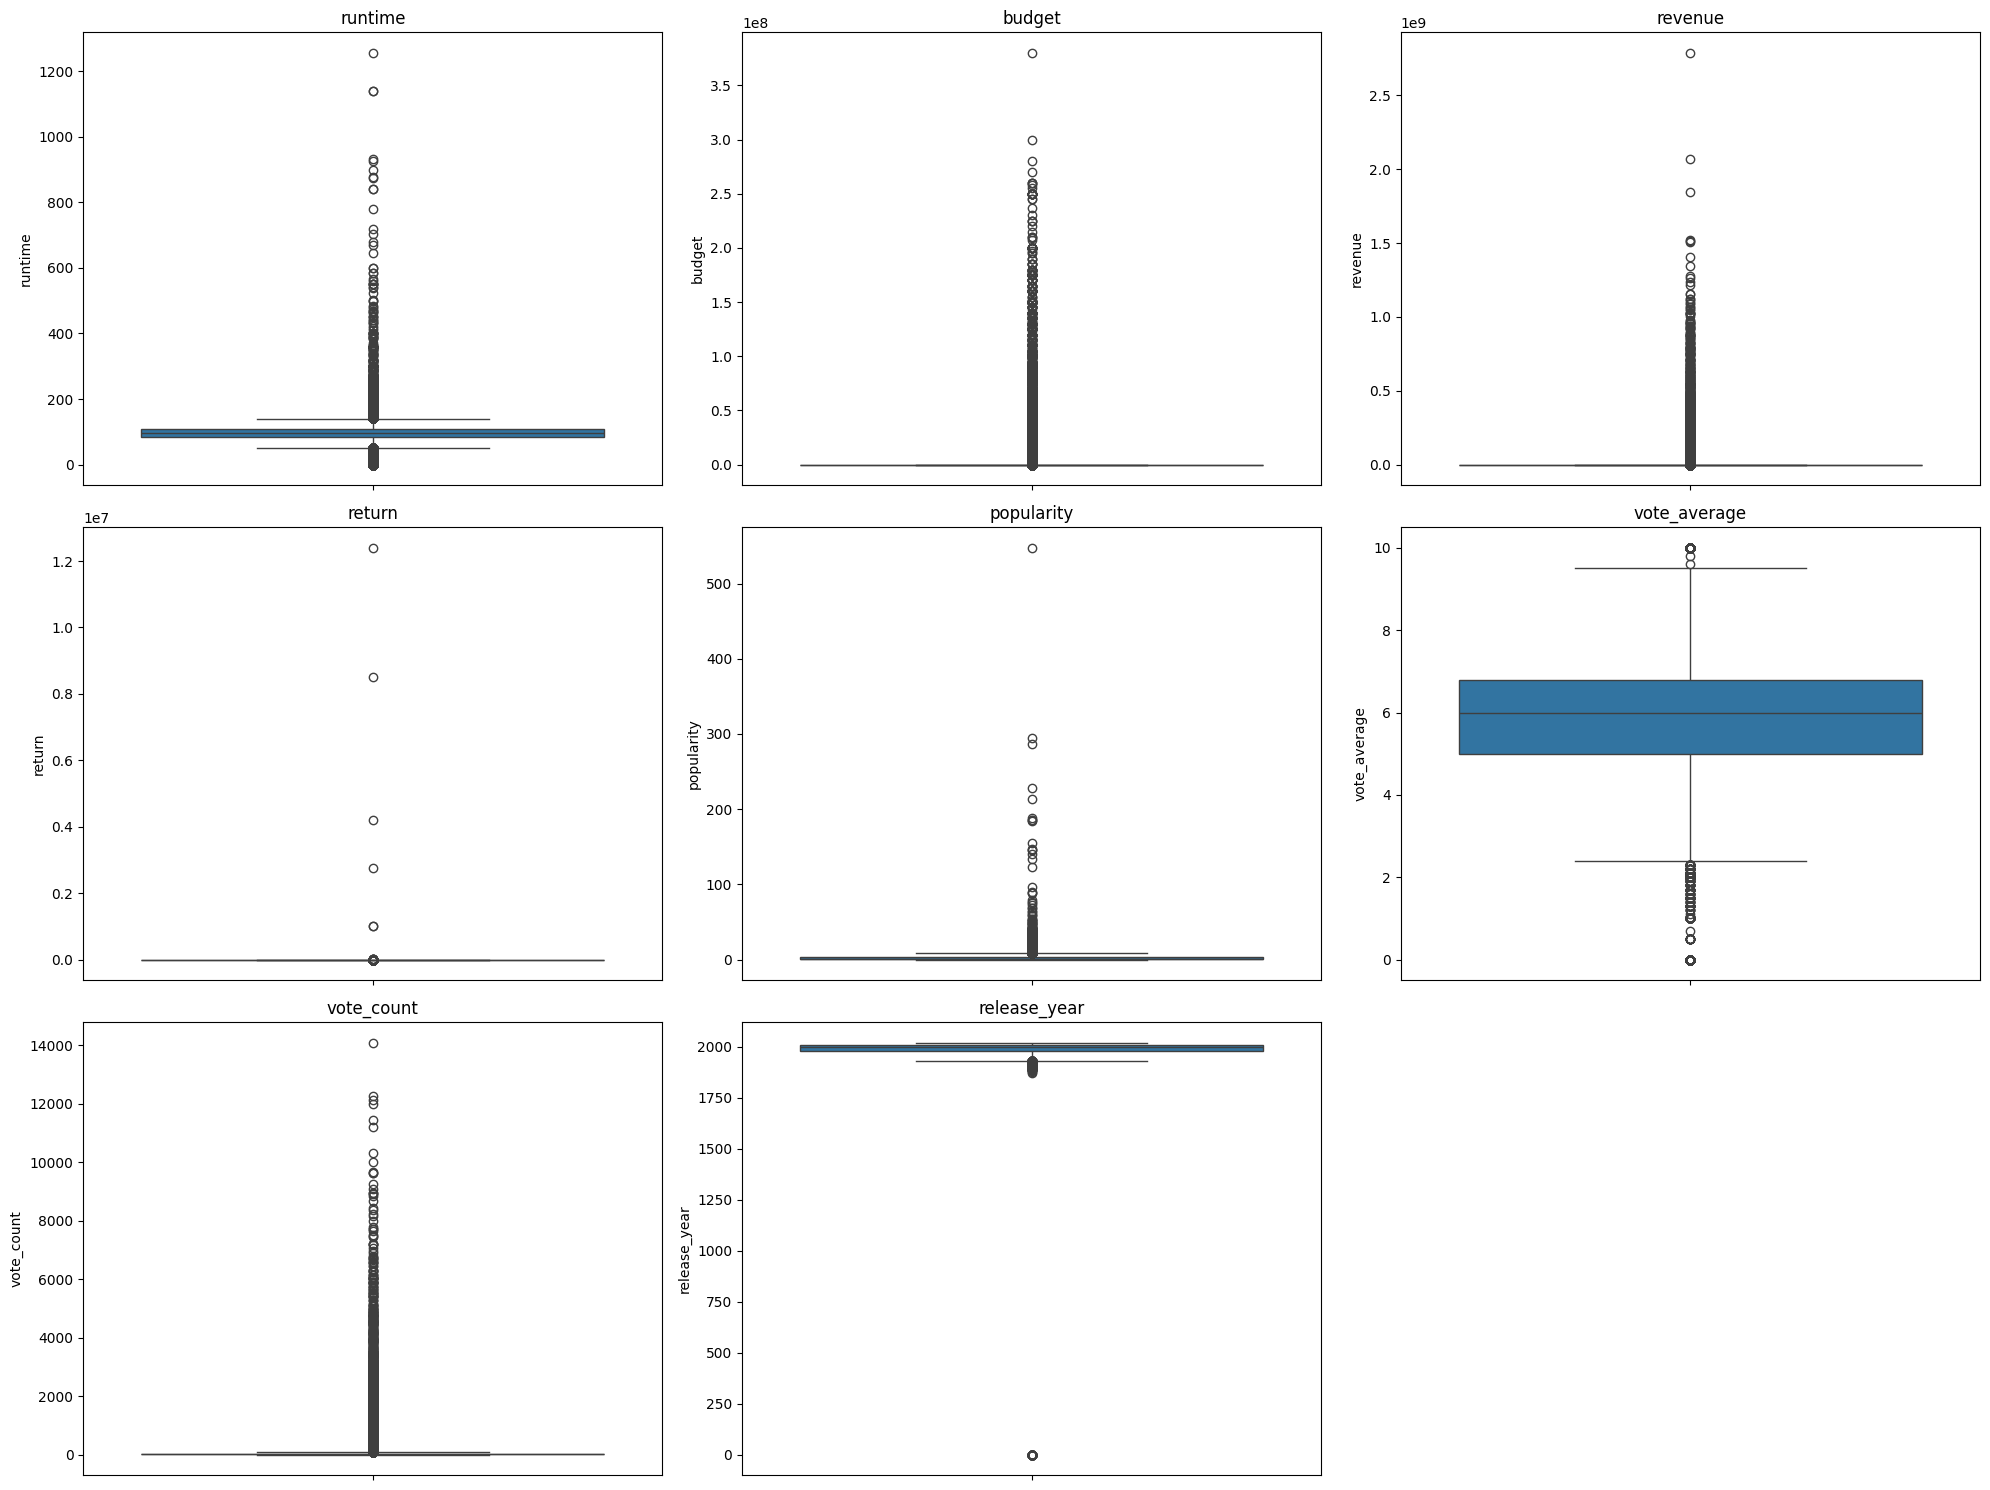

In [26]:
# EVALUACIOND DE OUTLIERS POR COLUMNAS

# Crear gráficos de caja para cada columna numérica
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)
    sns.boxplot(y=movies[col])
    plt.title(col)
plt.tight_layout()
plt.show()